<Axes: xlabel='x', ylabel='y'>

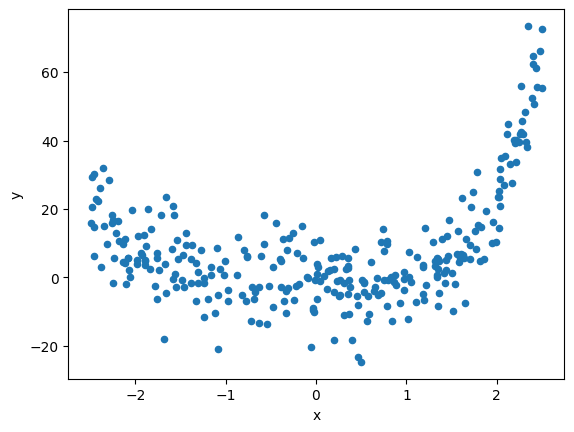

In [62]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')


In [63]:
# podzial danych
X = df[['x']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# ZAPISYWANIE WYNIKOW
mse_results = {}
regressor_objects = []

In [67]:
# regresja liniowa
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
mse_results['lin_reg'] = [mean_squared_error(y_train, lin_reg.predict(X_train)),
                          mean_squared_error(y_test, lin_reg.predict(X_test))]
regressor_objects.append((lin_reg, None))

In [68]:
# regresja KNN
for k in [3, 5]:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    mse_results[f'knn_{k}_reg'] = [mean_squared_error(y_train, knn_reg.predict(X_train)),
                                   mean_squared_error(y_test, knn_reg.predict(X_test))]
    regressor_objects.append((knn_reg, None))

In [69]:
# regresja wielomianowa (2-5 rzędu)

for degree in range(2, 6):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    mse_results[f'poly_{degree}_reg'] = [mean_squared_error(y_train, poly_reg.predict(X_train_poly)),
                                         mean_squared_error(y_test, poly_reg.predict(X_test_poly))]
    regressor_objects.append((poly_reg, poly))



In [74]:
mse_df = pd.DataFrame(mse_results, index=['train_mse', 'test_mse']).T
mse_df.to_pickle('mse.pkl')
print(mse_df)
print(regressor_objects)

             train_mse    test_mse
lin_reg     235.800680  275.345738
knn_3_reg    38.766525  101.469123
knn_5_reg    47.652597   83.133614
poly_2_reg   98.290593  102.481564
poly_3_reg   75.193068   88.905918
poly_4_reg   57.766040   78.518059
poly_5_reg   57.143889   80.756481
[(LinearRegression(), None), (LinearRegression(), None), (KNeighborsRegressor(n_neighbors=3), None), (KNeighborsRegressor(), None), (LinearRegression(), PolynomialFeatures()), (LinearRegression(), PolynomialFeatures(degree=3)), (LinearRegression(), PolynomialFeatures(degree=4)), (LinearRegression(), PolynomialFeatures(degree=5))]


In [75]:
with open('reg.pkl', 'wb') as f:
    pickle.dump(regressor_objects, f)